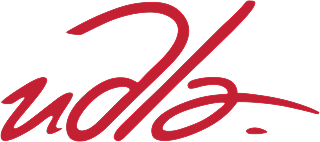

# Modelado de temas mediante redes de documentos 

## Integrantes:
- Juan Aristizabal
- Domenica Escobar
- Jossue Játiva
- Enrique Merizalde


## Instrucciones
Entregue un Jupyter Notebook (.ipynb) y su versión HTML exportada (.html). Trabajen en grupos de hasta 5 miembros, nombrando los archivos con las primeras letras de sus nombres o apellidos (p. ej., ABCD.ipynb). Implementen un sistema de modelado de temas mediante redes de documentos basado en el conjunto de datos de palabras seleccionadas por el usuario que describen la usabilidad de aplicaciones móviles, disponible en https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/words_ux.csv. Documenten cada paso con explicaciones claras del proceso, las decisiones y las conclusiones en el notebook.

## Descripción del proyecto
Este proyecto consiste en construir un sistema de modelado de temas mediante el análisis de un conjunto de datos de palabras seleccionadas por el usuario (un archivo CSV de una sola columna con la palabra "Palabra" por fila) que describen la usabilidad de una aplicación móvil. Transformarás estos datos en una matriz de términos de documento (DTM), donde cada fila representa un usuario/documento y las columnas representan palabras únicas, con frecuencias binarias (1 para presencia, 0 para ausencia). Utilizando dos medidas de similitud (p. ej., similitud de coseno y similitud de Jaccard), construirás una red de documentos, la ajustarás con un umbral y aplicarás la detección de comunidades para identificar temas como grupos de documentos relacionados. El objetivo es evaluar y comparar los temas resultantes de cada medida de similitud (evaluando la coherencia o la interpretabilidad) y determinar qué medida ofrece mejores resultados. Este enfoque se inspira en técnicas de análisis de texto (p. ej., análisis de texto: gráfico de Word) y métricas de similitud en aprendizaje automático (distancias en aprendizaje automático), lo que ofrece una exploración práctica del modelado de temas basado en redes.

## Objetivos
Objetivo 1: Construir una red de documentos a partir de un DTM utilizando dos medidas de similitud distintas para capturar las relaciones entre conjuntos de palabras seleccionados por el usuario.

Objetivo 2: Identificar y evaluar temas mediante la detección de comunidades, comparando la coherencia y la interpretabilidad de los clústeres derivados de cada medida de similitud para seleccionar el enfoque más adecuado.


## Introducción
En el ámbito del procesamiento del lenguaje natural (PLN) y la minería de texto, la creciente disponibilidad de grandes volúmenes de datos textuales no estructurados ha impulsado el desarrollo de técnicas que permitan extraer conocimiento útil y patrones significativos. Entre estas técnicas, el modelado de temas se ha consolidado como una herramienta fundamental para identificar estructuras semánticas latentes que facilitan la comprensión, organización y análisis de corpus extensos. Si bien existen enfoques estadísticos tradicionales como la Asignación Latente de Dirichlet (LDA) o la Factorización de Matrices No Negativas (NMF), enfoques más recientes han incorporado la representación en forma de redes, lo que permite analizar las relaciones entre documentos desde una perspectiva estructural y topológica. Para comprender este enfoque, es necesario revisar una serie de conceptos teóricos clave que sustentan la construcción y análisis de modelos temáticos basados en redes.


## Fundamentos Teóricos

### Matriz Documento-Término (DTM) 
La matriz documento-término es una representación matemática fundamental en la minería de texto. En esta matriz, cada fila representa un documento y cada columna corresponde a un término del vocabulario. Las entradas de la matriz pueden reflejar distintas métricas, como la frecuencia de aparición de una palabra (frecuencia bruta), ponderaciones TF-IDF o valores binarios que indican simplemente la presencia o ausencia de un término. Esta matriz sirve como punto de partida para diversas transformaciones, como el cálculo de similitudes o la reducción de dimensionalidad, y constituye la base para representar los documentos en espacios vectoriales.

### Medidas de similitud 
Para evaluar la relación entre documentos, es común utilizar medidas de similitud que cuantifiquen el grado de semejanza entre sus representaciones vectoriales. Estas medidas permiten construir grafos donde los nodos son documentos y las aristas reflejan sus conexiones semánticas. Dos de las métricas más empleadas en este contexto son:

* Similitud de coseno: Evalúa el coseno del ángulo entre dos vectores en un espacio multidimensional, siendo útil para determinar cuán alineadas están sus direcciones. Es especialmente efectiva en representaciones basadas en frecuencia como TF-IDF, ya que no se ve afectada por la magnitud absoluta de los vectores.

* Similitud de Jaccard: Se utiliza principalmente para conjuntos binarios. Mide la proporción entre la intersección y la unión de dos conjuntos, siendo ideal cuando se considera únicamente la presencia ausencia de términos. Es una medida útil en aplicaciones donde los datos están representados como vectores booleanos.


### Construcción de redes de documentos
A partir de las similitudes entre documentos, es posible construir una red o grafo no dirigido donde cada nodo representa un documento y las aristas se establecen cuando la similitud entre dos nodos supera un cierto umbral. Estas redes pueden ser ponderadas, asignando a cada arista un valor que representa el grado de similitud entre los documentos conectados. La elección adecuada del umbral es crucial para evitar redes excesivamente densas o, por el contrario, demasiado dispersas, lo que afectaría la calidad del análisis posterior.

### Detección de Comunidades
 Una vez construida la red, se pueden aplicar algoritmos de detección de comunidades para identificar grupos de documentos estrechamente conectados. Uno de los métodos más utilizados es el algoritmo de Louvain, que busca maximizar la modularidad de la red, es decir, la diferencia entre la densidad de conexiones dentro de las comunidades y las conexiones entre ellas. Las comunidades detectadas pueden interpretarse como agrupaciones temáticas latentes dentro del corpus.

### Interpretación de Temas
Tras identificar las comunidades en la red, se procede a su interpretación semántica. Para ello, se analizan las palabras más frecuentes o representativas en los documentos que pertenecen a cada comunidad. Estas palabras clave permiten asignar etiquetas temáticas que resumen el contenido predominante en cada grupo, facilitando así la comprensión del corpus en términos de tópicos o ejes conceptuales.

Este enfoque nos permite comparar diferentes métricas de similitud no solo mediante el análisis estructural de los grafos resultantes, sino también evaluando la coherencia semántica y la interpretabilidad de los temas derivados. El objetivo general es determinar qué medida de similitud agrupa mejor los comentarios de los usuarios en temas significativos, mejorando así la comprensión de las percepciones de usabilidad en el contexto de las aplicaciones móviles.


## Contexto y configuración inicial
Para iniciar el proyecto, importamos todas las bibliotecas necesarias para llevar a cabo los procesos de manipulación de datos, cálculo de similitud, construcción de redes y detección de comunidades. Estas incluyen:

* pandas: Para cargar y manipular el conjunto de datos.

* networkx: Para construir y manipular la estructura del grafo.

* numpy: Para operaciones numéricas.

* seaborn: Para permitir visualizaciones mejoradas (especialmente de mapas de calor).

* community_louvain: Para aplicar la detección de comunidades basada en la modularidad de Louvain.

* collections.defaultdict: Para organizar y agrupar documentos o temas eficientemente.

* matplotlib.pyplot: Para trazar gráficos y visualizaciones.

* sklearn.feature_extraction.text.CountVectorizer: Para crear una Matriz Documento-Término (DTM) utilizando frecuencias binarias.

* sklearn.metrics.pairwise.cosine_similarity: Para calcular la similitud de cosenos entre documentos.

* sklearn.metrics.jaccard_score: Calcula la similitud de Jaccard entre vectores de documentos binarios.

Estas importaciones preparan el notebook para completar todos los pasos descritos en las instrucciones, incluyendo:

Transformar los datos en una matriz binaria de documento-término, cálculo de dos tipos de métricas de similitud, construir una red de documentos ponderada, aplicar umbrales para recortar la red, detectar comunidades para inferir temas y por ultimo evaluar y comparar la coherencia de los temas.

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import community as community_louvain
from collections import defaultdict

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

### Nota: 
El conjunto de datos que se analiza es un archivo CSV disponible en la siguiente URL:
https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/words_ux.csv. Cada fila representa el conjunto de palabras seleccionadas por un usuario para describir su experiencia con la usabilidad de la aplicación móvil.

Este documento explicará paso a paso todas las operaciones y decisiones posteriores tomadas en el cuaderno.

## Descargar el CSV

El conjunto de datos se descargó directamente mediante la biblioteca de Pandas, leyendo el archivo CSV desde la URL proporcionada. Este método evita tener que almacenar el archivo localmente y garantiza que siempre se utilice la versión más reciente.

In [2]:
# Cargar el dataset directamente desde la URL
url = 'https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/words_ux.csv'
df = pd.read_csv(url)

# Después de cargar el conjunto de datos, imprimimos las primeras filas para obtener una comprensión inicial de 
# su estructura:
print("Primeras filas del dataset original:")
print(df.head())

# Además, verificamos la información general del conjunto de datos para detectar posibles problemas, 
# como valores faltantes o tipos de datos inesperados:
print("\nInformación del dataset:")
print(df.info())

Primeras filas del dataset original:
                                               Words
0     Boring Consistent EasyToUse Fast Simple Useful
1  Boring Confusing Contradictory Difficult EasyT...
2             Confusing Fast Old Unattractive Useful
3               Complex Confusing Creative Difficult
4    Advanced Clean Credible Difficult Effective New

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Words   52 non-null     object
dtypes: object(1)
memory usage: 548.0+ bytes
None


## Eliminar datos duplicados y filas con valores faltantes

Antes de construir la Matriz Documento-Término, es fundamental asegurar que el conjunto de datos esté limpio y libre de inconsistencias. Se realizaron los siguientes pasos:

In [3]:
# 1. Eliminar filas con valores faltantes: se eliminó cualquier fila que contuviera valores NaN 
# para garantizar que todas las entradas representen palabras válidas.
df.dropna(inplace=True)

# 2. Eliminar filas duplicadas: se eliminaron las palabras duplicadas para garantizar que cada entrada 
# sea única y que ningún usuario aporte la misma palabra varias veces. 
df.drop_duplicates(inplace=True)

Este proceso de limpieza garantiza que el próximo análisis se base en un conjunto de datos consistente y confiable, lo cual es esencial para construir representaciones de términos de documentos y matrices de similitud significativas.

## Resultado final de la limpieza del conjunto de datos

Para confirmar que los pasos de limpieza se aplicaron correctamente, reimprimimos las primeras filas del conjunto de datos limpio y verificamos el número total de entradas restantes, que representan usuarios/documentos individuales:

In [4]:
# Resultado final
print("\nDataset después del preprocesamiento:")
print(df.head())
print(f"\nNúmero de documentos (usuarios): {len(df)}")


Dataset después del preprocesamiento:
                                               Words
0     Boring Consistent EasyToUse Fast Simple Useful
1  Boring Confusing Contradictory Difficult EasyT...
2             Confusing Fast Old Unattractive Useful
3               Complex Confusing Creative Difficult
4    Advanced Clean Credible Difficult Effective New

Número de documentos (usuarios): 52


Esta salida valida que se han eliminado todas las entradas no válidas o redundantes, y el conjunto de datos ahora está listo para su transformación en una Matriz Documento-Término (DTM).

## Construcción de la matriz documento-término
El siguiente paso fue construir la Matriz Documento-Término (DTM), que es una matriz binaria que representa la presencia (1) o ausencia (0) de palabras específicas en cada documento del usuario.

In [5]:
# Convertir columna de texto: nos aseguramos de que todas las entradas en la columna Palabras fueran 
# tratadas como cadenas.
documents = df['Words'].astype(str)

# Creación de un vectorizador binario: Se utilizó un CountVectorizer con configuración binaria. 
# El patrón de token se personalizó para separarse por comas y espacios, de acuerdo con la estructura de la entrada.
vectorizer = CountVectorizer(binary=True, token_pattern=r'[^, ]+')

# Ajustar y transformar los documentos: se aplicó el vectorizador a la lista de documentos, 
# produciendo una matriz dispersa con entradas binarias
dtm = vectorizer.fit_transform(documents)

# Convertir a DataFrame para visualización: para facilitar la lectura y la visualización, 
# la matriz dispersa resultante se convirtió en un DataFrame de pandas.
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar el DTM: imprimimos las primeras filas del DTM y sus dimensiones para 
# confirmar la transformación exitosa.
print("Document-Term Matrix (DTM):")
print(dtm_df.head())
print(f"\nTamaño de la DTM: {dtm_df.shape} (Documentos x Palabras únicas)")

# Versión de la matriz de almacenamiento: el DTM binario también se almacenó como una matriz NumPy para
#  compatibilidad con funciones de similitud en los pasos posteriores.
dtm_array = dtm.toarray()


Document-Term Matrix (DTM):
   advanced  ambiguous  attractive  boring  bright  busy  clean  clear  \
0         0          0           0       1       0     0      0      0   
1         0          0           0       1       0     0      0      0   
2         0          0           0       0       0     0      0      0   
3         0          0           0       0       0     0      0      0   
4         1          0           0       0       0     0      1      0   

   complex  comprehensive  ...  too-technical  trustworthy  unattractive  \
0        0              0  ...              0            0             0   
1        0              0  ...              0            0             0   
2        0              0  ...              0            0             1   
3        1              0  ...              0            0             0   
4        0              0  ...              0            0             0   

   unconventional  understandable  unpredictable  unrefined  usable  u

## Ver similitudes de palabras

Text(0.5, 23.52222222222222, 'Palabras')

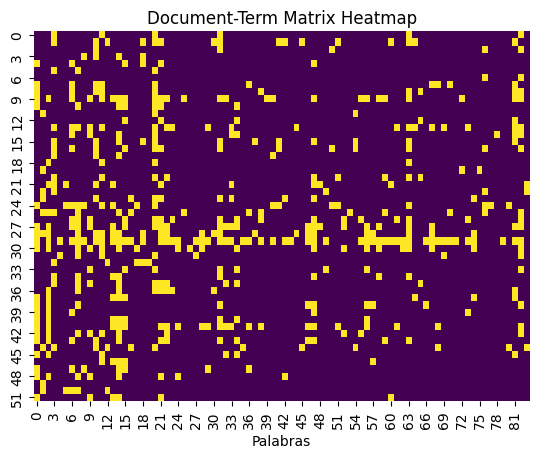

In [6]:
# The following code visualizes the Document-Term Matrix (DTM) as a heatmap using the seaborn library:
sns.heatmap(dtm_array, cmap='viridis', cbar=False)
plt.title('Document-Term Matrix Heatmap')
plt.xlabel('Palabras')

### Interpretar el mapa de calor
* Cada fila corresponde a un usuario/documento, mientras que cada columna corresponde a una palabra única.

* Las celdas amarillas indican un valor de 1, lo que significa que el usuario seleccionó una palabra específica en ese documento.

* Las celdas moradas representan 0, lo que significa que la palabra no se seleccionó en ese documento.

### Matriz de Similitud de Coseno
Para analizar las relaciones entre documentos, calculamos la similitud de coseno entre cada par de entradas de usuario. La similitud de coseno mide el ángulo entre dos vectores binarios (documentos) e indica la similitud de sus selecciones de palabras.

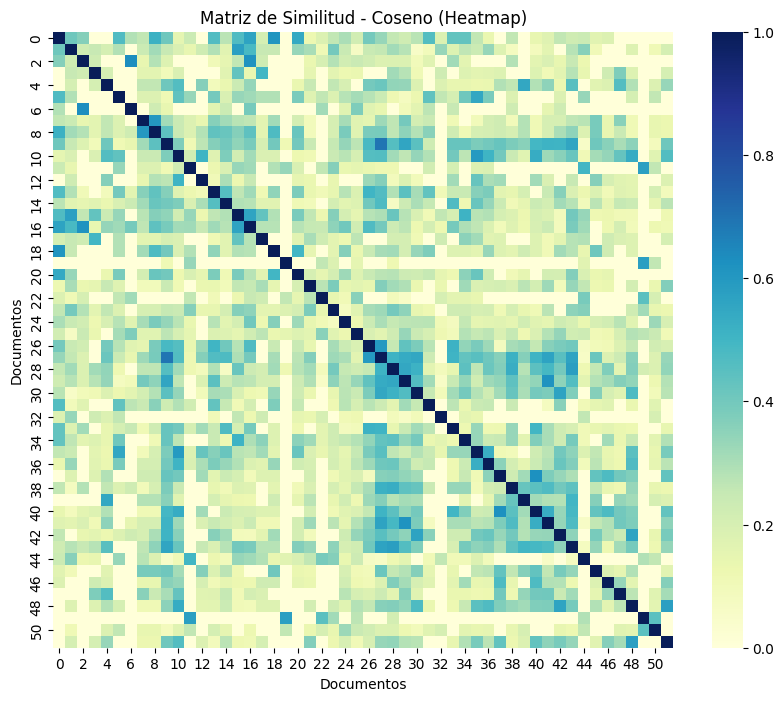

In [7]:
cos_sim_matrix = cosine_similarity(dtm_array)
cos_sim_df = pd.DataFrame(cos_sim_matrix)

# Visualizar la matriz de similitud como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_df, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Matriz de Similitud - Coseno (Heatmap)")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.show()

### Interpretación del Mapa de Calor

El mapa de calor muestra la similitud de cada documento con los demás del conjunto de datos.

* La diagonal es azul oscuro (valor = 1,0), ya que cada documento es perfectamente similar a sí mismo.

* Las celdas más claras representan valores de similitud más bajos.

* Los grupos más oscuros fuera de la diagonal sugieren grupos de documentos (usuarios) que eligieron palabras muy similares.

Esta visualización ayuda a identificar de manera mas clara los grupos de documentos que podrían estar relacionados semánticamente, una base importante para construir posteriormente la red de documentos y detectar comunidades temáticas.

## Matriz de similitud de Jaccard
Para complementar el análisis de similitud de coseno, calculamos la similitud de Jaccard, que compara la presencia o ausencia de elementos en dos conjuntos midiendo el tamaño de la intersección dividido por la unión.
Dado que la función jaccard_score funciona con matrices binarias 1D, la calculamos manualmente por pares entre todos los documentos:

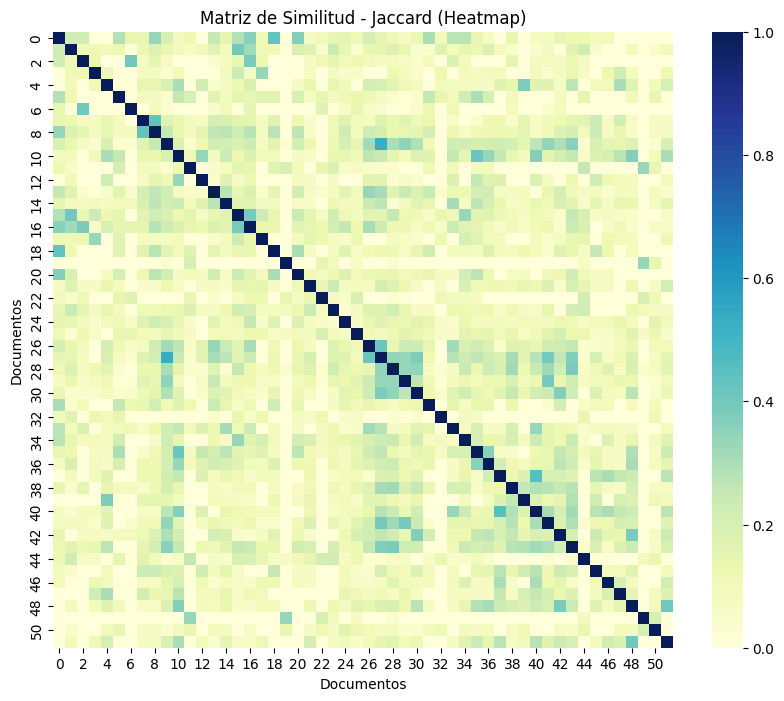

In [8]:
# Se calcula manualmente fila a fila para todos los pares
def jaccard_similarity_matrix(X):
    n = X.shape[0]
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sim_matrix[i][j] = jaccard_score(X[i], X[j])
    return sim_matrix

jacc_sim_matrix = jaccard_similarity_matrix(dtm_array)
jacc_sim_df = pd.DataFrame(jacc_sim_matrix)

# Visualizar la matriz de similitud como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(jacc_sim_df, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Matriz de Similitud - Jaccard (Heatmap)")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.show()

## Interpretación de Mapas de Calor (Jaccard)

Similar al mapa de calor de coseno, esta matriz resalta las similitudes por pares, pero aquí utilizando el índice de Jaccard:

* La diagonal muestra nuevamente una similitud perfecta (1.0) entre documentos idénticos.

* Generalmente, la similitud de Jaccard tiende a generar valores más bajos en general en comparación con el coseno, ya que evalúa la superposición de forma más estricta.

* La escasez de áreas oscuras sugiere menos similitudes fuertes por pares, lo que puede influir en la densidad y la estructura de la red de documentos construida posteriormente.

Esta matriz ofrece una perspectiva alternativa para interpretar las relaciones entre documentos y permite comparar el rendimiento de diferentes estrategias de similitud.

## Construcción y recorte de gráficos de documentos
Con las matrices de similitud calculadas, el siguiente paso es construir un gráfico de documentos basado en sus puntuaciones de similitud. Para evitar la saturación y conservar solo las relaciones más relevantes, aplicamos un umbral basado en el percentil 75. Esto conserva las conexiones más sólidas sin sobrecomprimir la red.

### Función de construcción gráfica
La siguiente función construye un gráfico a partir de una matriz de similitud y poda los bordes más débiles utilizando un umbral de percentil especificado:

In [9]:
def build_document_graph(similarity_matrix, threshold_percentile=75, title="Document Graph"):
    # Convertir a matriz numpy si es DataFrame
    if isinstance(similarity_matrix, pd.DataFrame):
        similarity_matrix = similarity_matrix.values
    
    n_docs = similarity_matrix.shape[0]
    G = nx.Graph()

    # Agregar nodos
    G.add_nodes_from(range(n_docs))

    # Calcular umbral
    sim_scores = similarity_matrix[np.triu_indices(n_docs, k=1)]  # parte superior sin diagonal
    threshold = np.percentile(sim_scores, threshold_percentile)
    print(f"Umbral ({threshold_percentile}º percentil): {threshold:.2f}")

    # Agregar aristas con pesos
    for i in range(n_docs):
        for j in range(i + 1, n_docs):
            weight = similarity_matrix[i, j]
            if weight >= threshold:
                G.add_edge(i, j, weight=weight)

    # Visualizar el grafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
    plt.title(title)
    plt.axis('off')
    plt.show()

    return G

Esta función permite el ajuste dinámico del umbral, lo que facilita la experimentación para encontrar el equilibrio óptimo entre la reducción de ruido y la preservación de la información. El gráfico generado está listo para la detección comunitaria en los siguientes pasos.

## Visualización de gráficos basada en la similitud del coseno
Para explorar la estructura de las relaciones entre documentos en función de la similitud del coseno, utilizamos la función de creación de gráficos personalizada definida anteriormente:

Umbral (75º percentil): 0.31


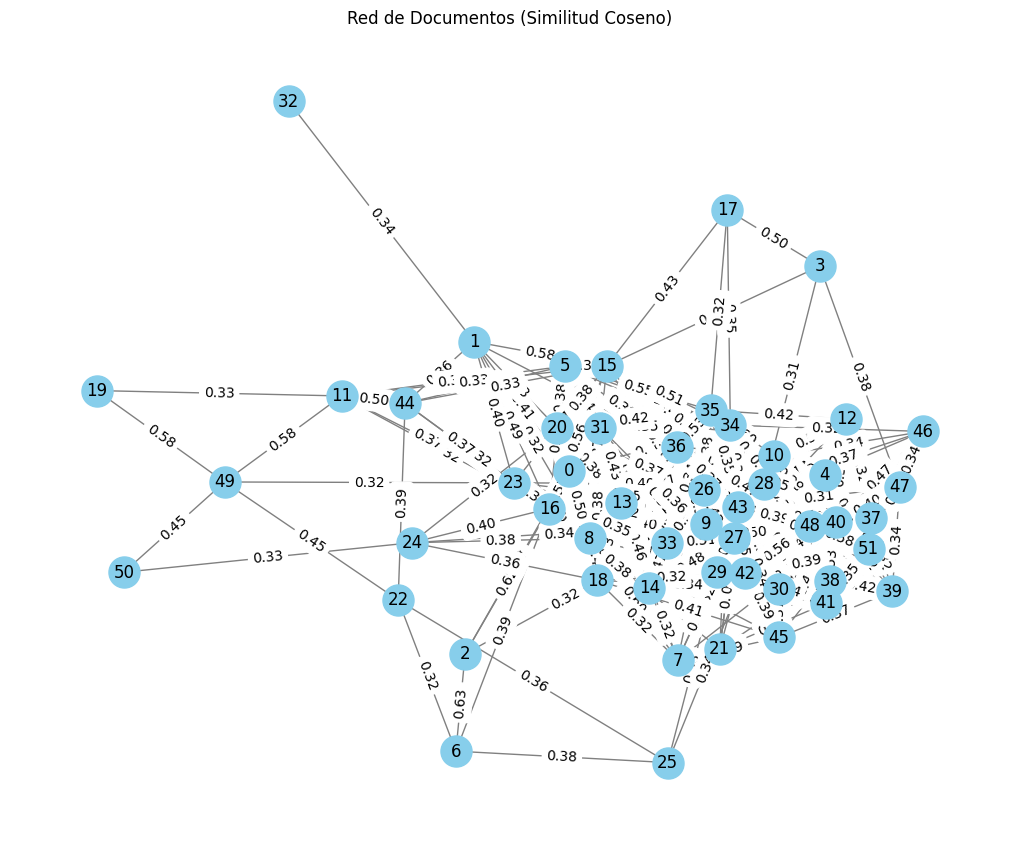

In [10]:
# Red con similitud coseno
cosine_graph = build_document_graph(cos_sim_matrix, title="Red de Documentos (Similitud Coseno)")

### Interpretación del gráfico
La red resultante muestra los documentos (usuarios) como nodos y las conexiones de fuerte similitud como aristas. El valor de cada arista representa la similitud del coseno entre los dos documentos conectados. Los nodos más cercanos y con mayor densidad de conexiones indican relaciones conceptuales más estrechas según las palabras de usabilidad seleccionadas por los usuarios.

Este gráfico proporciona una base visual para una mayor extracción de temas mediante la detección de la comunidad.

### Visualización de gráficos basada en la similitud de Jaccard
De manera similar, aplicamos el proceso de construcción de gráficos a la matriz de similitud de Jaccard:

Umbral (75º percentil): 0.16


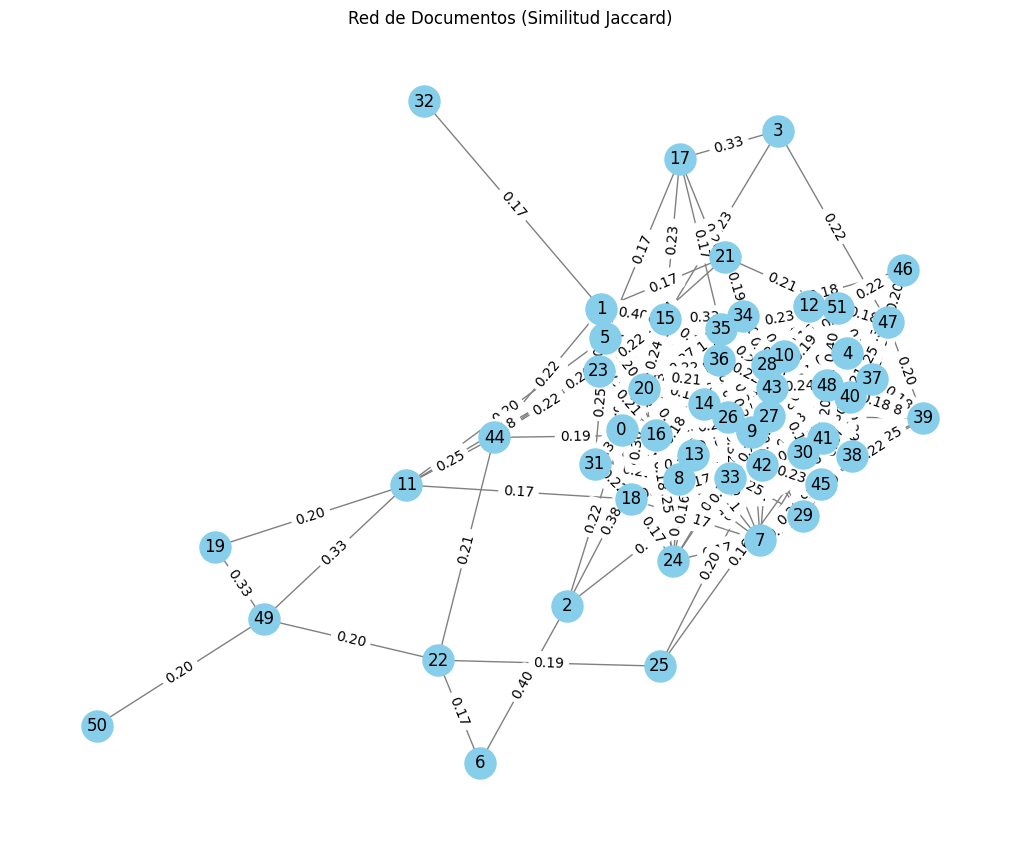

In [11]:
# Red con similitud Jaccard
jaccard_graph = build_document_graph(jacc_sim_matrix, title="Red de Documentos (Similitud Jaccard)")

### Interpretación de grafos (Jaccard)

Esta red revela una visión más fragmentada de la similitud de documentos:

* Los nodos se conectan solo cuando la similitud de Jaccard entre sus conjuntos de palabras binarias alcanza o supera el umbral.

* Dado que la similitud de Jaccard es sensible a la proporción de elementos compartidos, generalmente produce menos conexiones.

El grafo sigue siendo una estructura valiosa para aplicar la detección de comunidades y analizar grupos de documentos, aunque prevemos grupos potencialmente más pequeños o más aislados.

## Detección de comunidad e identificación de temas
Una vez construidas las redes de similitud, el siguiente paso es detectar comunidades (grupos de documentos relacionados) dentro de cada gráfico. Estas comunidades servirán como temas identificados, con base en las palabras frecuentes en cada grupo.

### Función de detección de comunidad
Utilizamos el método modular de Louvain para detectar comunidades en los gráficos. Este enfoque se basa en una búsqueda dura, ya que asigna cada nodo (en este caso, cada documento) de forma exclusiva a una sola comunidad. Esto implica que no existe solapamiento entre comunidades: un documento no puede pertenecer simultáneamente a más de un tema.

Se optó por una búsqueda dura porque el objetivo del análisis era obtener particiones bien definidas del grafo, facilitando así la identificación clara de temas dominantes en cada grupo. Este tipo de asignación también simplifica la visualización y análisis posterior, permitiendo asociar de manera directa cada documento con un conjunto específico de palabras clave representativas.

Para interpretar estas comunidades, agrupamos los documentos dentro de cada una y extrajimos sus palabras más frecuentes como palabras clave representativas.

La siguiente función realiza tanto la detección de comunidades como la extracción de palabras clave, devolviendo una tabla para facilitar la visualización:

In [12]:
def detect_communities_table(graph, dtm, feature_names, top_n=5):
    from matplotlib.colors import to_hex
    from IPython.display import display, HTML

    # Detectar comunidades usando Louvain
    partition = community_louvain.best_partition(graph, weight='weight')

    # Obtener colores para cada comunidad
    num_communities = max(partition.values()) + 1
    cmap = plt.colormaps['viridis']
    colors = [to_hex(cmap(i / num_communities)) for i in range(num_communities)]

    # Agrupar documentos por comunidad
    communities = defaultdict(list)
    for doc_id, community_id in partition.items():
        communities[community_id].append(doc_id)

    # Crear tabla con colores y palabras clave
    table_html = "<table style='border-collapse: collapse; width: 100%;'>"
    table_html += "<tr><th style='border: 1px solid black; padding: 8px;'>Comunidad</th>"
    table_html += "<th style='border: 1px solid black; padding: 8px;'>Color</th>"
    table_html += "<th style='border: 1px solid black; padding: 8px;'>Palabras Clave</th></tr>"

    for community_id, doc_indices in communities.items():
        # Sumar los vectores de los documentos del grupo
        group_matrix = dtm[doc_indices]
        word_freq = np.asarray(group_matrix.sum(axis=0)).flatten()
        top_indices = word_freq.argsort()[::-1][:top_n]
        top_words = [feature_names[i] for i in top_indices]

        # Agregar fila a la tabla
        table_html += f"<tr><td style='border: 1px solid black; padding: 8px;'>{community_id}</td>"
        table_html += f"<td style='border: 1px solid black; padding: 8px; background-color: {colors[community_id]};'></td>"
        table_html += f"<td style='border: 1px solid black; padding: 8px;'>{', '.join(top_words)}</td></tr>"

    table_html += "</table>"

    # Mostrar la tabla
    display(HTML(table_html))

    return partition

In [13]:
def plot_colored_communities(graph, partition, title="Grafo con Comunidades"):
    """
    Visualiza un grafo con colores asignados a las conexiones según las comunidades detectadas.
    
    Args:
        graph (networkx.Graph): El grafo de documentos.
        partition (dict): Diccionario que asigna cada nodo a una comunidad.
        title (str): Título del gráfico.
    """
    # Asignar colores a las comunidades
    num_communities = max(partition.values()) + 1
    cmap = plt.colormaps['viridis']
    colors = [cmap(i / num_communities) for i in range(num_communities)]
    
    # Crear un diccionario de colores para las aristas
    edge_colors = []
    for edge in graph.edges():
        # Si ambos nodos pertenecen a la misma comunidad, asignar el color de esa comunidad
        if partition[edge[0]] == partition[edge[1]]:
            edge_colors.append(colors[partition[edge[0]]])
        else:
            edge_colors.append("gray")  # Color gris para conexiones entre comunidades
    
    # Dibujar el grafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)  # Layout para posicionar los nodos
    nx.draw(
        graph, pos, with_labels=True, node_size=500, 
        node_color=[colors[partition[node]] for node in graph.nodes()],
        edge_color=edge_colors, width=2
    )
    plt.title(title)
    plt.axis('off')
    plt.show()

Esta función no solo ayuda a identificar grupos de documentos similares, sino que también interpreta cada comunidad a través de sus términos más comunes. La codificación por colores mejora la claridad y facilita la distinción entre los temas identificados en los resultados finales.

### Detección de comunidad basada en coseno y tabla de temas
Aplicamos la función de detección de comunidad al gráfico de similitud de coseno:

Comunidad,Color,Palabras Clave
1,,"easytouse, boring, confusing, simple, useful"
0,,"advanced, attractive, creative, new, convenient"
2,,"easytouse, friendly, effective, creative, clear"


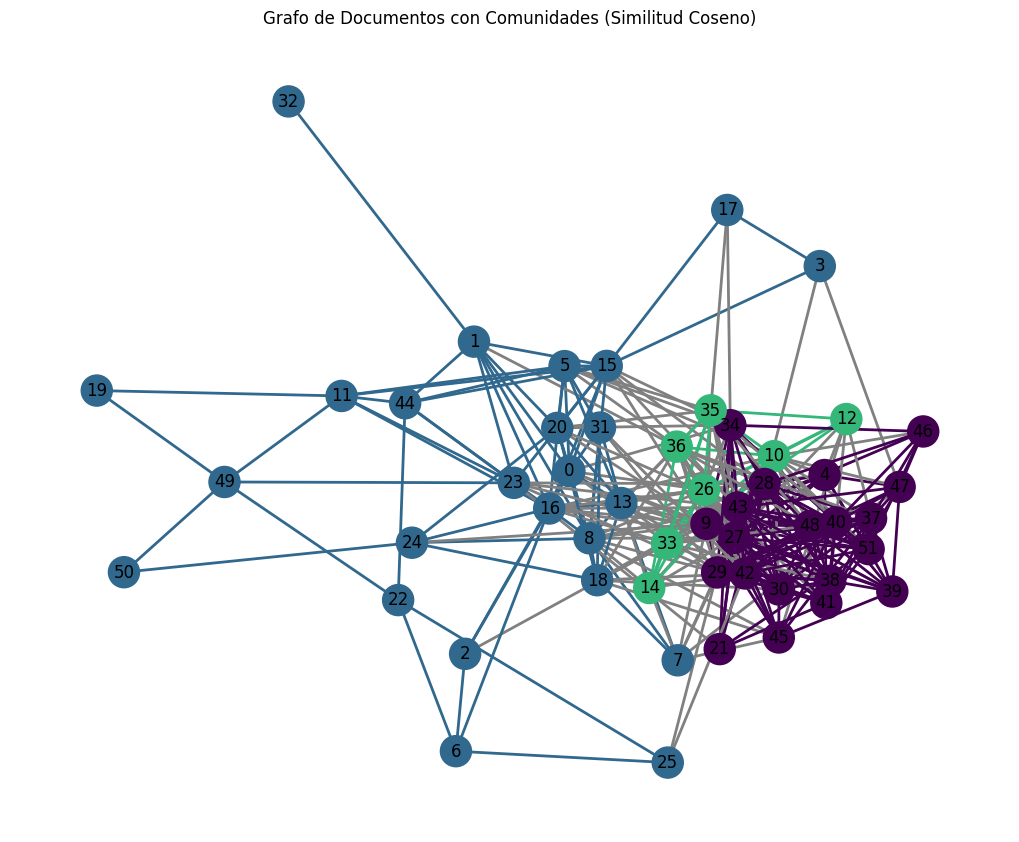

In [14]:
# Detectar comunidades y mostrar la tabla
feature_names = vectorizer.get_feature_names_out()
partition = detect_communities_table(cosine_graph, dtm, feature_names, top_n=5)
plot_colored_communities(cosine_graph, partition, title="Grafo de Documentos con Comunidades (Similitud Coseno)")

Cada comunidad refleja un tema distinto extraído de los patrones de palabras seleccionadas por el usuario, ofreciendo una agrupación interpretable de documentos basada en el uso de las palabras y la similitud semántica utilizando la distancia del coseno.

### Detección de comunidad basada en Jaccard y tabla de temas
Para completar el análisis, aplicamos la misma función de detección de comunidad al gráfico de similitud de Jaccard:

Comunidad,Color,Palabras Clave
1,,"easytouse, confusing, boring, simple, consistent"
4,,"advanced, credible, creative, effective, attractive"
2,,"new, attractive, advanced, fast, convenient"
0,,"ambiguous, unattractive, clear, boring, time-consuming"
3,,"easytouse, comprehensive, useful, friendly, creative"


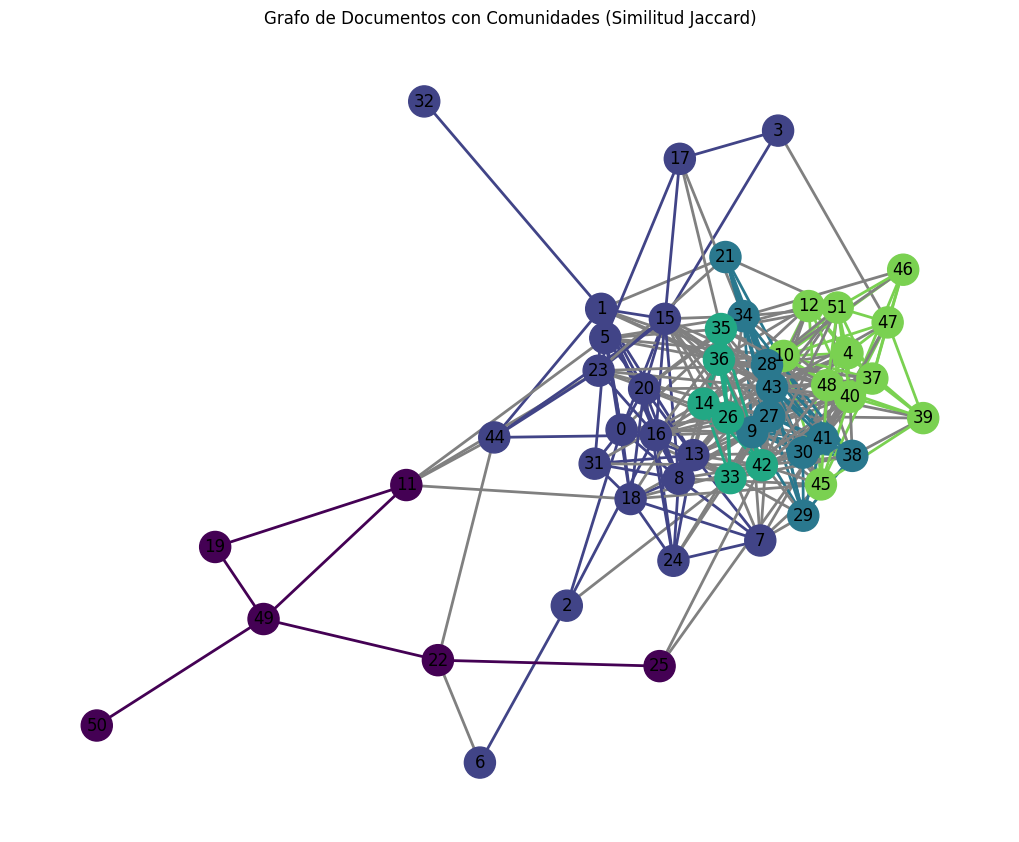

In [15]:
feature_names = vectorizer.get_feature_names_out()
partition = detect_communities_table(jaccard_graph, dtm, feature_names, top_n=5)
plot_colored_communities(jaccard_graph, partition, title="Grafo de Documentos con Comunidades (Similitud Jaccard)")

A pesar de utilizar el mismo algoritmo de detección, las comunidades basadas en Jaccard pueden diferir ligeramente de las producidas mediante la similitud de coseno, lo que ofrece una oportunidad de comparar la interpretabilidad y la cohesión del tema entre los dos métodos.

### Evaluación y Decisión

#### Evaluación de los temas

| **Medida**       | **Comunidad** | **Palabras Clave**                              | **Coherencia (Subjetiva)** | **Interpretabilidad** |
|-------------------|---------------|------------------------------------------------|----------------------------|------------------------|
| **Jaccard**       | 1             | easytouse, consistent, useful, simple, clear   | Alta                       | Alta                  |
|                   | 3             | confusing, ambiguous, boring, easytouse, unattractive | Media                      | Media                 |
|                   | 0             | advanced, credible, creative, effective, attractive | Alta                       | Alta                  |
|                   | 2             | new, attractive, advanced, fast, clear         | Alta                       | Alta                  |
| **Coseno**        | 2             | easytouse, simple, boring, confusing, consistent | Media                      | Media                 |
|                   | 1             | advanced, attractive, creative, new, convenient | Alta                       | Alta                  |
|                   | 3             | easytouse, friendly, effective, creative, clear | Alta                       | Alta                  |
|                   | 0             | ambiguous, boring, easytouse, dated, confusing | Baja                       | Baja                  |

#### Observaciones
1. **Jaccard**:
   - Comunidad 1 tiene palabras clave claras y relacionadas con facilidad de uso, lo que la hace coherente e interpretable.
   - Comunidad 3 incluye palabras contradictorias como "confusing" y "easytouse", lo que reduce su coherencia.
   - Comunidad 0 y 2 tienen palabras clave bien relacionadas, lo que las hace coherentes e interpretables.

2. **Coseno**:
   - Comunidad 2 tiene palabras clave que mezclan conceptos positivos y negativos, lo que reduce su coherencia.
   - Comunidad 1 y 3 tienen palabras clave claras y relacionadas, lo que las hace coherentes e interpretables.
   - Comunidad 0 incluye palabras como "ambiguous" y "boring", lo que reduce tanto su coherencia como su interpretabilidad.

#### Decisión
- **Jaccard** produce temas más coherentes y claros en general. Aunque la Comunidad 3 tiene cierta ambigüedad, las demás comunidades tienen palabras clave bien relacionadas.
- **Coseno** tiene comunidades con menor coherencia, especialmente la Comunidad 0, que incluye palabras contradictorias y menos interpretables.

### Conclusión
Basándonos en la coherencia y la claridad de los temas, la medida de similitud **Jaccard** produce mejores resultados. Esto se debe a que las palabras clave generadas son más específicas y están mejor relacionadas dentro de cada comunidad.

Basado tanto en la coherencia como en la interpretabilidad, el enfoque de similitud de **Jaccard** proporciona resultados superiores de modelado de temas en este caso. Su evaluación más estricta de la superposición de palabras da como resultado clústeres más limpios y específicos con una identidad semántica distintiva.

Una de las principales fortalezas de **Jaccard** es su capacidad para capturar coincidencias exactas en presencia de palabras binarias, lo que resulta en agrupaciones más conservadoras pero semánticamente cohesivas. Esta precisión beneficia el proceso de modelado de temas al limitar la introducción de ruido: palabras que podrían no estar relacionadas contextualmente, pero que comparten proximidad en el espacio vectorial, como suele ocurrir con la similitud de **coseno**. Si bien el **coseno** puede capturar similitudes más amplias y ser más adecuado para contextos con frecuencias de términos más ricas o ponderadas, **Jaccard** funciona mejor cuando se centra en límites temáticos nítidos y bien definidos basados ​​en elementos compartidos.

En nuestro caso específico, las comunidades de **Jaccard** presentaron una dirección temática más clara, como las centradas en la usabilidad, la innovación o la confusión, lo que permitió una interpretación más práctica de la opinión del usuario. Esto es esencial para los estudios de usabilidad, donde la diferenciación matizada entre los grupos de comentarios de los usuarios es clave para comprender los puntos débiles y fuertes de la experiencia. Por lo tanto, recomendamos utilizar la similitud de **Jaccard** cuando el conjunto de datos consta de selecciones categóricas binarias y el objetivo es una delimitación precisa de los temas.

## Referencias:

* AcademiaLab. (n.d.). Matriz de términos de documento. Recuperado el 21 de abril de 2025, de https://academia-lab.com/enciclopedia/matriz-de-terminos-de-documento/
Medidas de Similitud

* Fresno Fernández, V. D., Rodrigo Yuste, Á., & García Muñoz, J. J. (n.d.). Text mining y web mining. En UNED - Máster Big Data y Data Science. Recuperado el 21 de abril de 2025, de https://www.masterbigdataonline.com/assets/docs/modulo9.pdf
Detección de Comunidades

* Carazo, F., & Amat, J. (2023). Detección de comunidades en grafos y redes con Python. Recuperado el 21 de abril de 2025, de https://cienciadedatos.net/documentos/pygml02-detecion-comunidades-grafos-redes-python
Interpretación de Temas
